## MobileNet


**Key Ideas**
- DepthWise Seperable Convolutions
  - Depthwise Convolutions
  - Pointwise Convolutions
- Width Multiplier
- Resolution Multiplier

**Three Version**

- 2017 : [MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications](https://arxiv.org/pdf/1704.04861.pdf)
- 2019 : [MobileNetV2: Inverted Residuals and Linear Bottlenecks](https://arxiv.org/pdf/1801.04381.pdf)
- 2019 : [Searching for MobileNetV3](https://arxiv.org/abs/1905.02244)

### MobileNet block

MobileNet block comprises of layers as denoted below:

▶ **Depthwise conv -> BN -> ReLU -> 1x1 conv -> BN -> ReLU**


Depthwise conv differs from Normal conv in terms of performing convolution
- Depthwise conv -> conv performed on seperate channels and then concatenated together

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, AveragePooling2D, ReLU, BatchNormalization, DepthwiseConv2D, Conv2D, GlobalAvgPool2D
from tensorflow.keras.models import Model

In [2]:
def mobilenet_block(x, filters, strides=1):
  """
  Args:
    x : input
    strides : strides for depthwise convolution
    filters : filters required for pointwise convolution
  """
  x = DepthwiseConv2D(kernel_size=3, strides=strides, padding='same')(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = Conv2D(filters, 1)(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  return x



### MobileNet Architecture

In [3]:
def mobilenet(input_shape=(224,224,3), num_classes=10):
  input = Input(shape=input_shape)
  x = Conv2D(32, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = mobilenet_block(x, 64)
  x = mobilenet_block(x, 128, strides=2)
  x = mobilenet_block(x, 128)
  x = mobilenet_block(x, 256, strides=2)
  x = mobilenet_block(x, 256)
  x = mobilenet_block(x, 512, strides=2)

  for _ in range(5):
    x = mobilenet_block(x, 512)

  x = mobilenet_block(x, 1024, strides=2)
  x = mobilenet_block(x, 1024)
  x = GlobalAvgPool2D()(x)
  output = Dense(units=num_classes, activation='softmax')(x)
  model = Model(input, output)
  return model

### Model

In [4]:
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 1000

model = mobilenet(INPUT_SHAPE, NUM_CLASSES)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d (Depthwis  (None, 112, 112, 32)      320       
 eConv2D)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 32)      128   

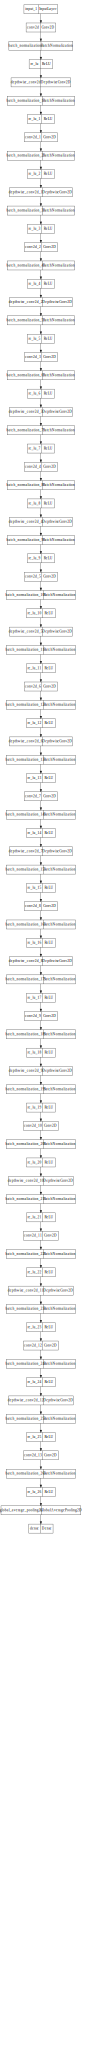

In [5]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot


SVG(model_to_dot(model).create(prog='dot', format='svg'))